# Preprocessing for all signals

In [271]:
file = "2025-11-11_20-24-26-288.txt"

In [272]:
import ast
import numpy as np 

with open(file , "r") as f:
    text = f.read()

res = ast.literal_eval(text)  # Safe conversion from string to dict


In [273]:
res.keys()

dict_keys(['CH1', 'CH2', 'CH3', 'general_config'])

In [274]:
res["CH1"].keys()

dict_keys(['BANDWIDTH', 'COUPLING', 'IMPEDANCE', 'INVERT', 'OFFSET', 'POSITION', 'PROBe', 'SCALE', 'channel', 'raw_data', 'x_increment', 'x_origin', 'y_increment', 'y_offset', 'y_origin'])

In [275]:
#voltages = (wave - y_offset) * y_increment + y_origin  
#times = np.arange(len(voltages)) * x_increment + x_origin 

In [280]:
tim_div = float(res['general_config']['general']['HORIZONTAL:MAIN:SCALE?'].split(" ")[-1])
tim_div

4e-06

In [281]:
Npoints= float(res['general_config']['general']['WFMPRE:NR_Pt?'].split(" ")[-1])
Npoints

10000.0

In [331]:
Ts = (tim_div*10)/Npoints  # 10 div in the oscillo 
Ts

3.9999999999999994e-09

In [332]:
# Other method 
ch = list(res.keys())[0]
Ts = float(res[ch]['x_increment'].split(" ")[-1])
Ts

4e-09

In [291]:
dicres = {}
for channel in res.keys(): 
    if "CH" in channel : 
        y_increment =  float(res[channel]["y_increment"].split(" ")[-1])
        y_origin =  float(res[channel]["y_origin"].split(" ")[-1])
        y_offset =  float(res[channel]["y_offset"].split(" ")[-1])
        raw = np.array(res[channel]['raw_data'])
        voltage = (raw - y_offset) * y_increment + y_origin
        dicres[channel]= voltage
time = np.arange(0, len(voltage)*Ts, Ts)
dicres["time"]=time

In [292]:
res['CH1']["y_increment"]

':WFMPRE:YMULT 3.125E-5\n'

In [293]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [294]:
df= pd.DataFrame(dicres).astype("float64")
df.loc[0, "Ts"]=Ts
df

,CH1,CH2,CH3,time,Ts
0,0.492000,-0.041984,-0.360938,0.000000e+00,4.000000e-09
1,0.484000,-0.039984,-0.360000,4.000000e-09,NaN
2,0.492000,-0.042000,-0.200000,8.000000e-09,NaN
3,0.488000,-0.040000,-0.320000,1.200000e-08,NaN
4,0.492000,-0.040063,-0.360000,1.600000e-08,NaN
...,...,...,...,...,...
9995,0.511969,-0.041984,7.880000,3.998000e-05,NaN
9996,0.499938,-0.038047,7.919688,3.998400e-05,NaN
9997,0.504000,-0.038141,7.840625,3.998800e-05,NaN
9998,0.504000,-0.046000,7.800000,3.999200e-05,NaN


In [295]:
df.to_csv(file.replace(".txt",".csv"), index = False)

# Plot 

In [296]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [297]:
file = "2025-11-11_20-24-26-288.csv"

In [298]:
df = pd.read_csv(file)
df

,CH1,CH2,CH3,time,Ts
0,0.492000,-0.041984,-0.360938,0.000000e+00,4.000000e-09
1,0.484000,-0.039984,-0.360000,4.000000e-09,NaN
2,0.492000,-0.042000,-0.200000,8.000000e-09,NaN
3,0.488000,-0.040000,-0.320000,1.200000e-08,NaN
4,0.492000,-0.040063,-0.360000,1.600000e-08,NaN
...,...,...,...,...,...
9995,0.511969,-0.041984,7.880000,3.998000e-05,NaN
9996,0.499937,-0.038047,7.919688,3.998400e-05,NaN
9997,0.504000,-0.038141,7.840625,3.998800e-05,NaN
9998,0.504000,-0.046000,7.800000,3.999200e-05,NaN


In [324]:
Ts=  df.loc[0, "Ts"]
Ts

np.float64(4e-09)

In [325]:
df.columns

Index(['CH1', 'CH2', 'CH3', 'time', 'Ts'], dtype='object')

<Axes: xlabel='time'>

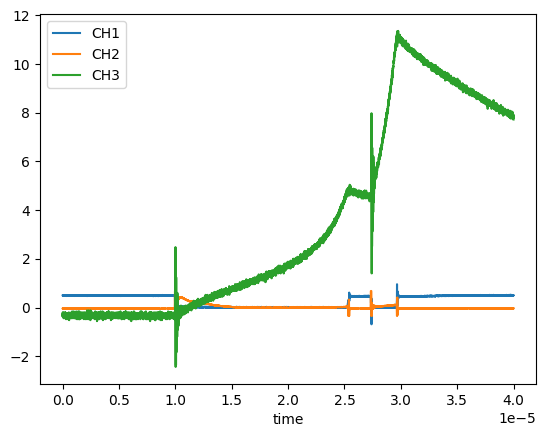

In [326]:
df.plot(x = "time", y= ['CH1', 'CH2', 'CH3'])

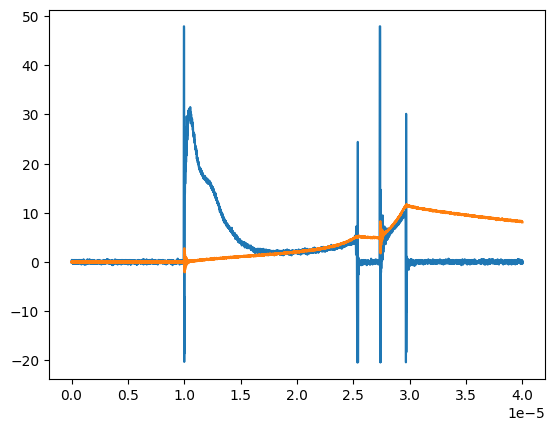

In [371]:
R= 0.0150 # R150
ID = (df["CH2"]/R).values# V = r*i
ID = ID -ID [:200].mean()
time = df.time.values
vds= df.CH1.values*100 # 1/100 sonde 
vds= vds -vds[:200].mean()
IL= (df.CH3) .values # mA
IL = IL -IL[:200].mean()
plt.plot(time, ID) 
plt.plot(time, IL)

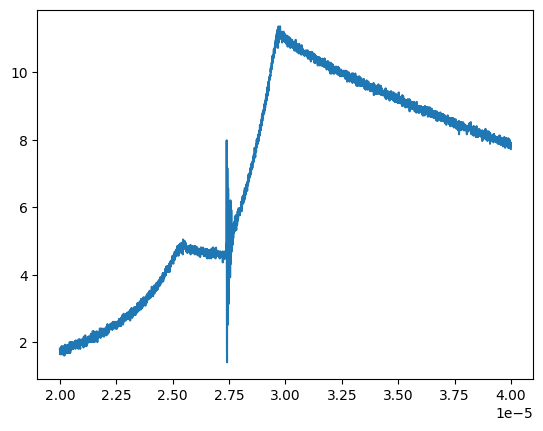

In [328]:
plt.plot(time[5000:], IL[5000:])

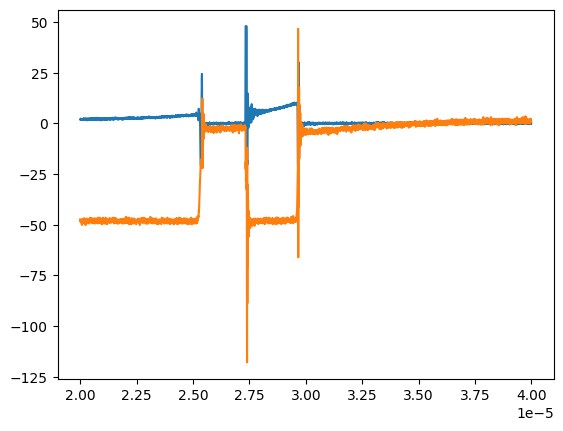

In [329]:
ID2 = ID[5000:]
vds2 = vds[5000:]
t2= time[5000:]
P = ID2*vds2
#plt.plot(t2,P)
plt.plot(t2, ID2)
plt.plot(t2, vds2)

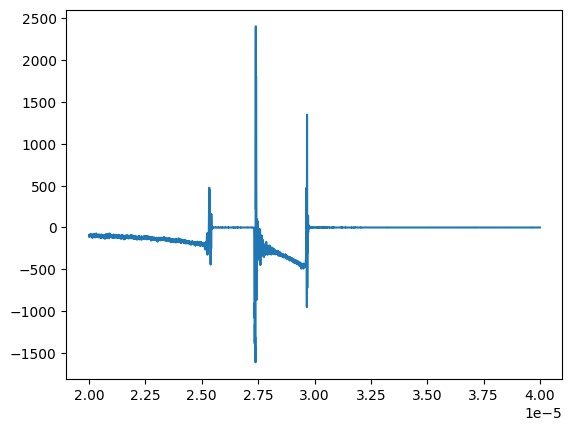

In [305]:
plt.plot(t2,P)

In [381]:
vds2_ = vds2-vds2[:200].mean()

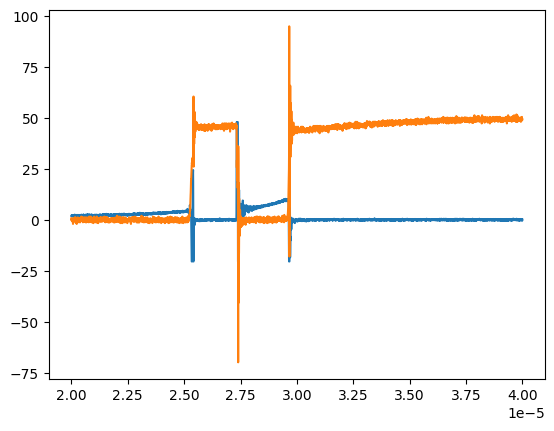

In [382]:
plt.plot(t2, ID2)
plt.plot(t2, vds2_)

In [307]:
E= np.cumsum(P) * Ts

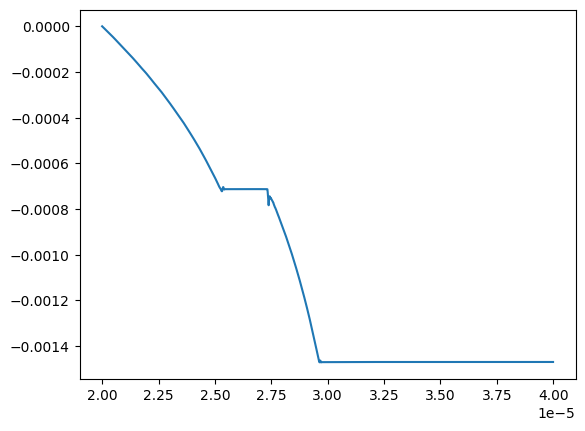

In [308]:
plt.plot(t2, E)

In [309]:
E= np.cumsum(np.abs(P)) * Ts

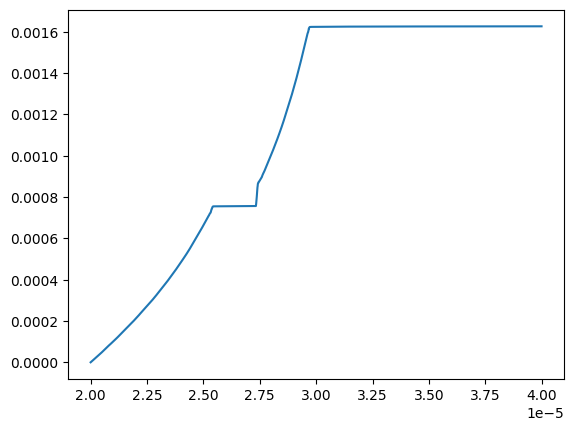

In [310]:
plt.plot(t2, E)

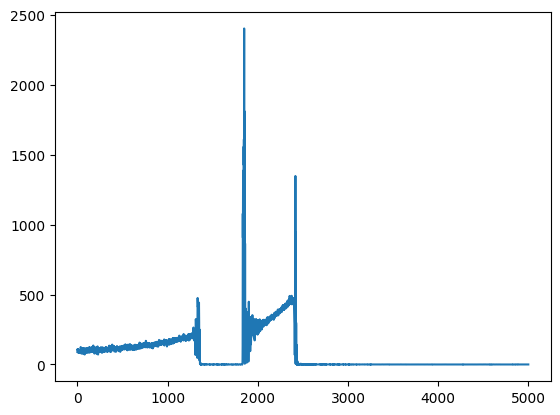

In [311]:
P2 = np.abs(P)
plt.plot(P2)

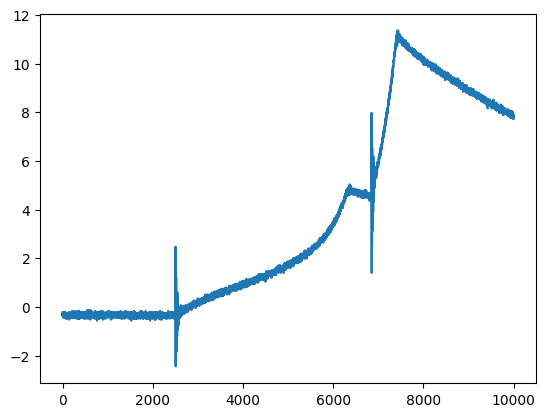

In [312]:
plt.plot(IL)

In [313]:
IL2=IL-IL[:1000].mean()

In [314]:
np.where(IL2>2)[0]

array([2502, 2509, 2510, ..., 9997, 9998, 9999], shape=(5062,))

In [315]:
ns= np.where(IL2>2)[0][0]
ns

np.int64(2502)

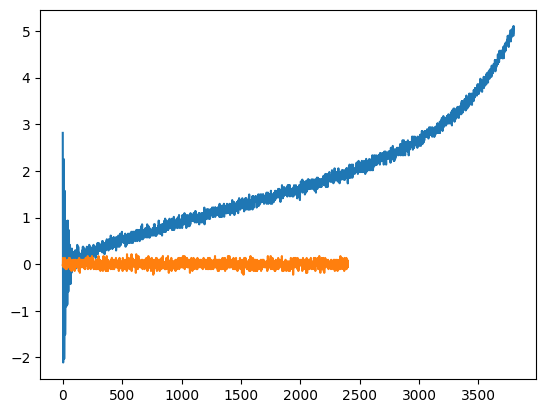

In [358]:
IL3= IL2[ns:6300]
plt.plot(IL3)
plt.plot(IL2[:ns-100])
IL3 = IL3-IL2[:ns-100].mean()

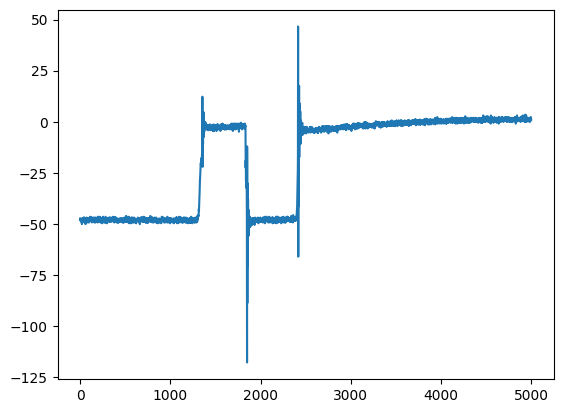

In [359]:
plt.plot(vds2)

In [360]:
len(IL3)

3798

In [361]:
#4us*10/10000
Ts, 4e-6*10/10000

(4e-09, 3.9999999999999994e-09)

-48.12571562500001
-0.00018278146794375007
[0.00000000e+00 4.81383903e-08 9.62767806e-08 ... 1.82685191e-04
 1.82733330e-04 1.82781468e-04]


Text(0, 0.5, 'B')

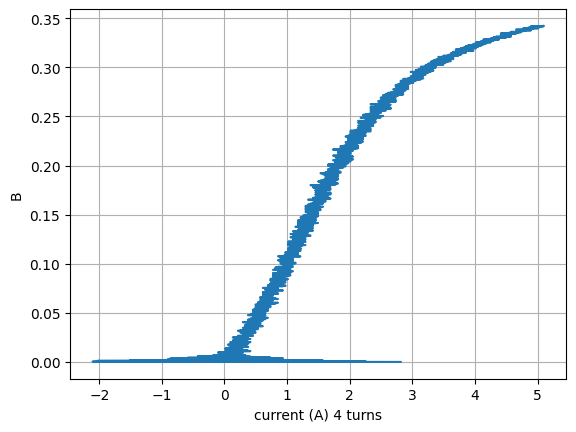

In [362]:
# v = L * di/dt = d(L*i)/dt = dphi/dt 
# phi = integral(v, dt) = E* delta_time 
# B = phi * Ae

# turns = 4 
N= 4
E = vds2[:1000].mean()
print(E)

delta_time = len(IL3)*Ts
phi_final= E*delta_time/N
print(phi_final)

phi = np.linspace(0, -phi_final, len(IL3))
print(phi)


Ae= 534.2 # mm2 # ELP 102/20/38 with I 102/7/38
Ae = 1e-6*Ae # m2
#phi = B*A
B = phi /Ae
plt.plot(IL3, B)
plt.grid()
plt.xlabel(f"current (A) {N} turns")
plt.ylabel("B")

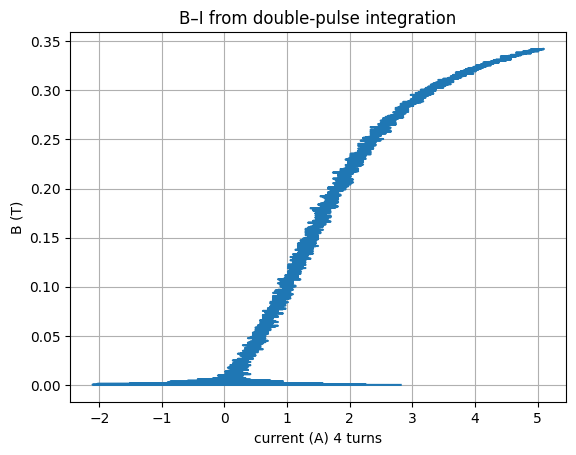

In [363]:
import numpy as np
import matplotlib.pyplot as plt

# --- Inputs you must have from your measurement ---
# vL: numpy array of the inductor voltage over the interval of interest (V)
# IL3: numpy array of the inductor current over same interval (A)
# Ts: sample period (s)
# N: number of turns
# Ae_mm2: effective core area in mm^2

N = 4
Ae_mm2 = 534.2
Ae = Ae_mm2 * 1e-6  # m^2

# ----- Preprocess voltage: remove DC offset to avoid drift -----
vL = np.zeros(len(IL3))+E

# ----- Integrate to get flux linkage then flux -----
# cumulative integral (rectangle rule); for better accuracy use trapezoid below
lambda_linkage = np.cumsum(vL) * Ts              # Wb-turn
# or: lambda_linkage = np.concatenate(([0], np.cumtrapz(vL, dx=Ts)))

phi = lambda_linkage / N                          # Wb
B = phi / Ae                                      # T

# (Optional) realign so B(0)=0
#B = B - B[0]
B = -B

# ----- Plot B vs I -----
plt.figure()
plt.plot(IL3, B)
plt.grid(True)
plt.xlabel(f"current (A) {N} turns")
plt.ylabel("B (T)")
plt.title("B–I from double-pulse integration")
plt.show()

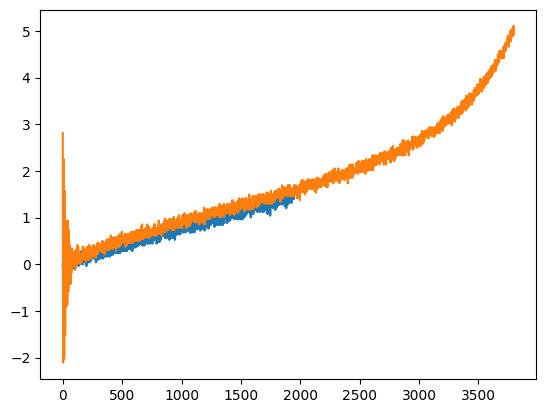

252.12893793812572 15758.058621132857
64.14644397013393 %


(np.float64(0.0002521289379381257), np.float64(5.8968355178005884e-06))

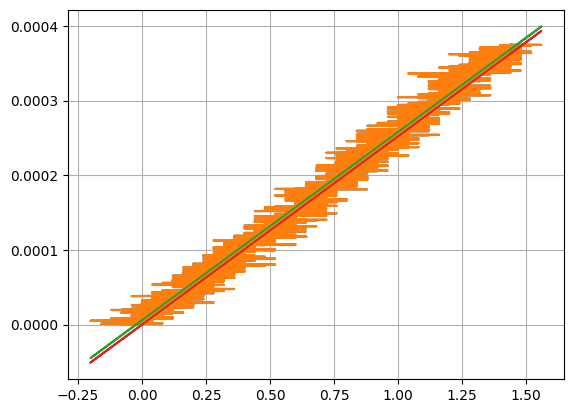

In [364]:
# V = L di/dt 
# V*dt = L di 
# if L constant 
# Flux_link = integ(V*dt) = L integ(di) = L i 
n1= 250
n2 = 2200
IL4 = IL3[n1: n2]
time4 = np.arange (0,len(IL4)*Ts,Ts)

Lam4 = -lambda_linkage[n1:n2]
Lam4  = Lam4-Lam4[0]
IL4 = IL4-IL4[0]
plt.plot(IL4)
plt.plot(IL3)
plt.show()
plt.plot(IL4, Lam4)


from sklearn.linear_model import  LinearRegression as LR 


x = IL4.reshape(-1, 1)
y = Lam4

lr = LR()
lr.fit(x, y)
a = lr.coef_[0]
b = lr.intercept_
plt.plot(IL4, Lam4)
plt.plot(IL4, IL4*a+b)
plt.plot(IL4, IL4*a)

L_uH = 1e6*a
# L = Al *N**2
Al_nH = (L_uH /N**2) *1000
print(L_uH, Al_nH)

Al_nH_nom = 9600 # N97 AL = 9600 25% 
error = 100*(Al_nH-Al_nH_nom) /Al_nH_nom
print(error, "%")
plt.grid()
a, b

In [370]:
# E = L di/dt
# i = E/L* time 

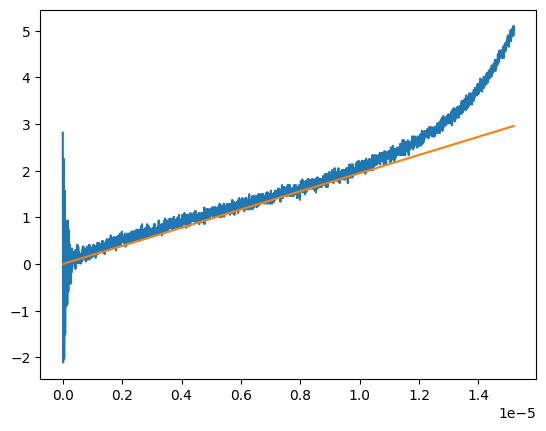

In [369]:

time3 = np.arange (0,len(IL3)*Ts,Ts)
plt.plot(time3 , IL3)
Iperf= -time3*E/(L_uH*0.98*1e-6)
plt.plot(time3, Iperf)

# filter 

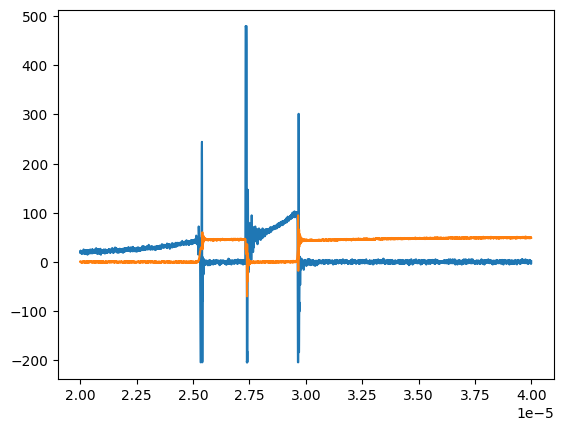

In [385]:
plt.plot(t2, 10*ID2)
plt.plot(t2, vds2_)

(2.5e-05, 2.6e-05)

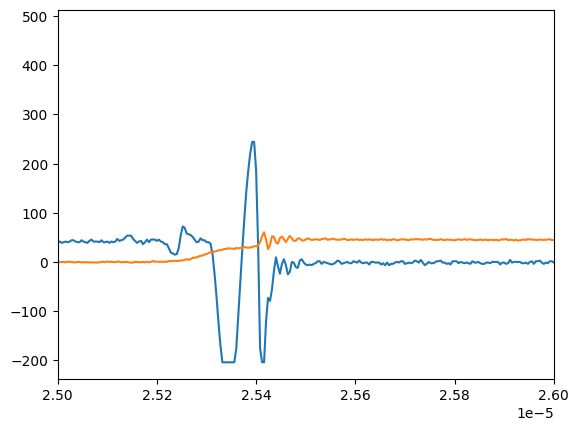

In [386]:
plt.plot(t2, 10*ID2)
plt.plot(t2, vds2_)
plt.xlim([2.5e-5,2.6e-5])

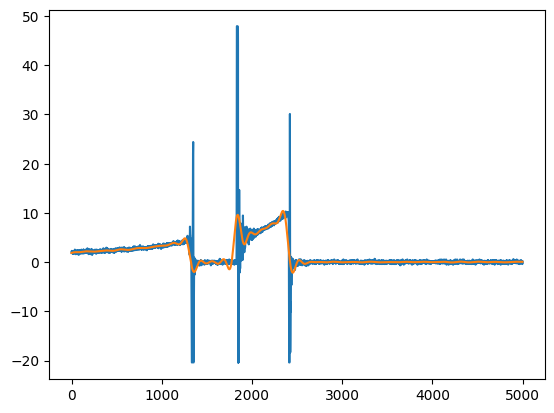

In [400]:
import numpy as np
from scipy.signal import butter, sosfiltfilt

Ts = 4e-9           # 4 ns
Fs = 1 / Ts         # 250 MHz
fc = 2e6         # 200 kHz
wn = fc / (Fs/2)    # normalized cutoff

# Zero-phase low-pass (Butterworth IIR + filtfilt)
sos = butter(6, wn, btype='low', output='sos')  # order 6 is a good start
ID2_filt = sosfiltfilt(sos, ID2)                # zero group delay
plt.plot(ID2)
plt.plot(ID2_filt)

In [388]:
ID2_filt = sosfiltfilt(sos, ID2, padlen=0)  # or trim a small margin after filtering

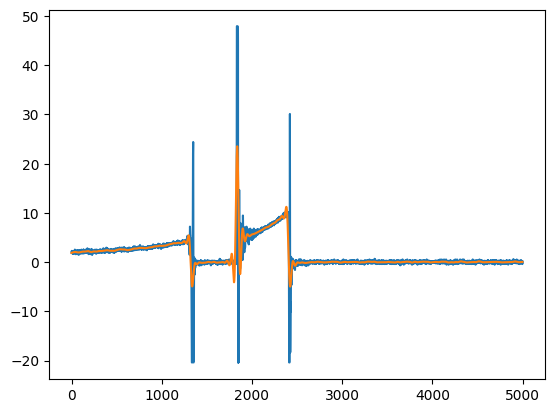

In [398]:
from scipy.signal import butter, sosfiltfilt

def lp_zero_phase(ID, Ts, fc=200e3, order=6):
    Fs = 1.0 / Ts
    wn = fc / (Fs/2.0)
    sos = butter(order, wn, btype='low', output='sos')
    return sosfiltfilt(sos, ID)
ID2_filt = lp_zero_phase(ID2, Ts=4e-9, fc=5e6, order=6)
plt.plot(ID2)
plt.plot(ID2_filt)